In [ ]:
!pip install surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163325 sha256=115cc7bf3315708a6d86a16ac5ed55f917ad20b48351e04dff980b79b30578d4
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, KNNBasic


In [ ]:
from google.colab import files
uploaded1 = files.upload()
import io



Saving ratings_small.csv to ratings_small.csv


In [3]:
df = pd.read_csv('ratings_small.csv')
df.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
df.shape

(100004, 4)

In [6]:
sim_options = {
    "name": "cosine",
}

In [7]:
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
reader = Reader()
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
train, test = train_test_split(data, test_size=0.25, random_state=1)

Trying different number of neigbours to see if this parameter affects the performance of the model.  
The default number of factors is 40, hence we will tweak the number of neighbours from 1-100 to evaluate the performance.

In [8]:
import time
from collections import defaultdict

# A dictionary to store the rsme, fit time and prediction time 
knn_dict = defaultdict(dict)
for i in range(100):
    knn = KNNBasic(k=i+1)
    start_time = time.time()
    knn.fit(train)
    fit_time = time.time() - start_time
    predictions = knn.test(test)
    knn_dict[i+1]['rmse'] = rmse(predictions)
    knn_dict[i+1]['fit_time'] = fit_time
    knn_dict[i+1]['prediction_time'] = time.time() - start_time - fit_time

# A dataframe to store the results
knn_df = pd.DataFrame(knn_dict)
knn_df

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2142
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0743
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0242
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9997
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9867
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9789
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9740
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9703
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9686
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9677
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9665
Computing the msd similarity matrix...
Done computing 

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
rmse,1.214227,1.074302,1.024209,0.999702,0.986658,0.978893,0.974050,0.970307,0.968626,0.967680,...,0.978492,0.978550,0.978577,0.978632,0.978676,0.978737,0.978796,0.978862,0.978940,0.979009
fit_time,0.135309,0.101963,0.091546,0.088459,0.105690,0.084111,0.081914,0.082925,0.085994,0.088401,...,0.142823,0.127803,0.105955,0.145771,0.128661,0.141829,0.140433,0.105496,0.090054,0.088955
prediction_time,0.513465,0.708669,0.623439,0.644739,0.623569,0.654068,0.599877,0.649141,0.704768,0.691625,...,1.286920,1.152300,1.032193,1.319640,1.124912,1.336527,1.067718,0.954248,0.959522,1.000344


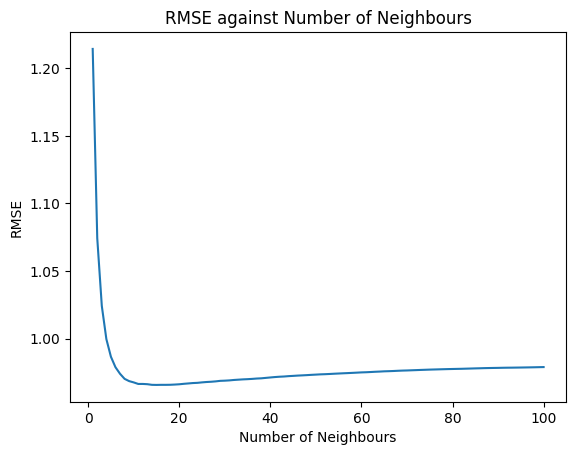

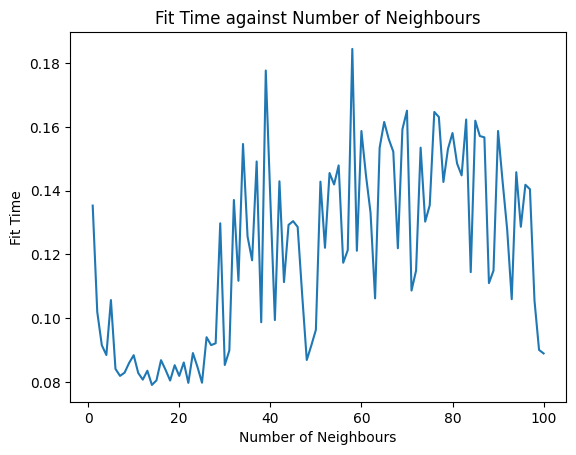

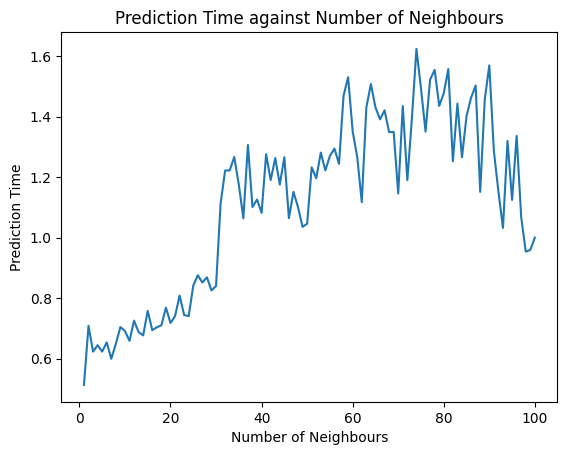

In [11]:
# Plot the RMSE, fit time and prediction time against the number of factors
import matplotlib.pyplot as plt
plt.plot(knn_df.loc['rmse'])
plt.xlabel('Number of Neighbours')
plt.ylabel('RMSE')
plt.title('RMSE against Number of Neighbours')
plt.show()

plt.plot(knn_df.loc['fit_time'])
plt.xlabel('Number of Neighbours')
plt.ylabel('Fit Time')
plt.title('Fit Time against Number of Neighbours')
plt.show()

plt.plot(knn_df.loc['prediction_time'])
plt.xlabel('Number of Neighbours')
plt.ylabel('Prediction Time')
plt.title('Prediction Time against Number of Neighbours')
plt.show()


For KNNBasic, it is different from SVD and NMF in the sense that we can also configure the sim_options to evaluate the performance of the different similarity measurement metrics.

In [30]:
msd_sim_options = {
    "name": "msd"
}

cosine_sim_options = {
    "name": "cosine"
}

pearson_sim_options = {
    "name": "pearson"
}

euclidean_sim_options = {
    "name": "euclidean"
}

sim_options = [msd_sim_options,  cosine_sim_options, pearson_sim_options, euclidean_sim_options]

msd_dict = defaultdict(dict)
cosine_dict = defaultdict(dict)
pearson_dict = defaultdict(dict)
euclidean_dict = defaultdict(dict)

for sim_option in sim_options:
    for i in range(100):
        knn = KNNBasic(sim_option=sim_option, k=i+1)
        start_time = time.time()
        knn.fit(train)
        fit_time = time.time() - start_time
        predictions = knn.test(test)

        if sim_option['name'] == 'msd':
            msd_dict[i+1]['rmse'] = rmse(predictions)
            msd_dict[i+1]['fit_time'] = fit_time
            msd_dict[i+1]['prediction_time'] = time.time() - start_time - fit_time

        elif sim_option['name'] == 'cosine':
            cosine_dict[i+1]['rmse'] = rmse(predictions)
            cosine_dict[i+1]['fit_time'] = fit_time
            cosine_dict[i+1]['prediction_time'] = time.time() - start_time - fit_time
            
        elif sim_option['name'] == 'pearson':
            pearson_dict[i+1]['rmse'] = rmse(predictions)
            pearson_dict[i+1]['fit_time'] = fit_time
            pearson_dict[i+1]['prediction_time'] = time.time() - start_time - fit_time

        else:
            euclidean_dict[i+1]['rmse'] = rmse(predictions)
            euclidean_dict[i+1]['fit_time'] = fit_time
            euclidean_dict[i+1]['prediction_time'] = time.time() - start_time - fit_time


msd_df = pd.DataFrame(msd_dict)
cosine_df = pd.DataFrame(cosine_dict)
pearson_df = pd.DataFrame(pearson_dict)
euclidean_df = pd.DataFrame(euclidean_dict)



Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2142
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0743
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0242
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9997
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9867
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9789
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9740
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9703
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9686
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9677
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9665
Computing the msd similarity matrix...
Done computing 

In [31]:
msd_df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
rmse,1.214227,1.074302,1.024209,0.999702,0.986658,0.978893,0.974050,0.970307,0.968626,0.967680,...,0.978492,0.978550,0.978577,0.978632,0.978676,0.978737,0.978796,0.978862,0.978940,0.979009
fit_time,0.116489,0.118592,0.148189,0.108944,0.112137,0.098779,0.166388,0.100194,0.108093,0.133391,...,0.099862,0.111273,0.116389,0.103536,0.108240,0.100642,0.115878,0.100655,0.150066,0.094515
prediction_time,0.603888,0.715487,0.705882,0.703985,0.869323,0.751162,0.798799,0.780970,0.923561,0.985220,...,1.102056,1.149991,1.100862,1.047225,1.055665,1.149512,1.155527,1.077919,1.082967,1.118281


In [33]:
cosine_df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
rmse,1.214227,1.074302,1.024209,0.999702,0.986658,0.978893,0.974050,0.970307,0.968626,0.967680,...,0.978492,0.978550,0.978577,0.978632,0.978676,0.978737,0.978796,0.978862,0.978940,0.979009
fit_time,0.103381,0.095684,0.100212,0.101533,0.099989,0.100247,0.099697,0.099931,0.103822,0.099328,...,0.100055,0.144235,0.137820,0.156832,0.115180,0.111613,0.119282,0.192950,0.119576,0.098474
prediction_time,0.604277,0.733120,0.651004,0.663675,0.699872,0.749881,0.816773,0.779241,0.750372,0.750528,...,1.203124,1.136960,1.258010,1.342421,1.102707,1.083999,1.192731,1.165379,1.182021,1.279443


In [34]:
pearson_df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
rmse,1.214227,1.074302,1.024209,0.999702,0.986658,0.978893,0.974050,0.970307,0.968626,0.967680,...,0.978492,0.978550,0.978577,0.978632,0.978676,0.978737,0.978796,0.978862,0.978940,0.979009
fit_time,0.141686,0.125816,0.163993,0.113580,0.114868,0.100597,0.103855,0.100144,0.133470,0.096817,...,0.181771,0.136415,0.135143,0.175248,0.107593,0.191296,0.124150,0.192061,0.171157,0.119797
prediction_time,0.701627,0.734752,0.688602,0.825882,0.726453,0.727841,0.751129,0.748909,0.901015,0.768986,...,1.753638,1.460549,1.205850,1.116537,1.277525,1.655331,1.519794,1.666034,1.629317,1.391908


In [35]:
euclidean_df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
rmse,1.214227,1.074302,1.024209,0.999702,0.986658,0.978893,0.974050,0.970307,0.968626,0.967680,...,0.978492,0.978550,0.978577,0.978632,0.978676,0.978737,0.978796,0.978862,0.978940,0.979009
fit_time,0.138675,0.186601,0.172202,0.117978,0.149928,0.158700,0.142831,0.122215,0.113599,0.163637,...,0.175888,0.155113,0.129576,0.146251,0.110068,0.145350,0.177631,0.133358,0.137536,0.165530
prediction_time,0.874232,0.985670,0.828681,0.872163,1.000253,1.392342,0.943391,0.886104,1.101317,1.104133,...,1.473313,1.397205,1.694997,1.405233,1.368101,1.538854,1.342564,1.528483,1.429955,1.495149


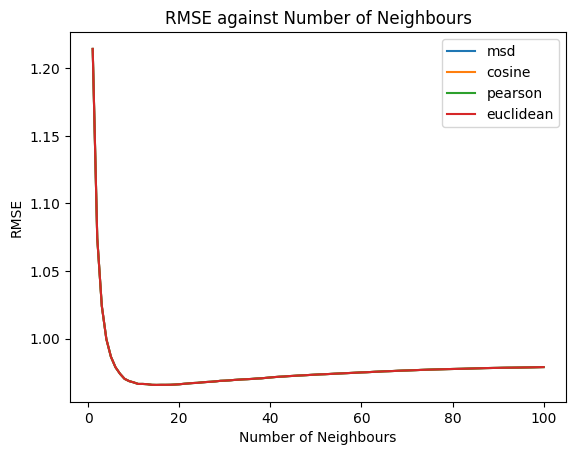

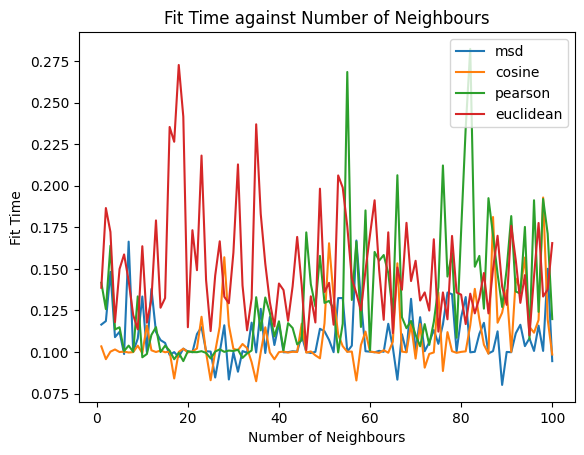

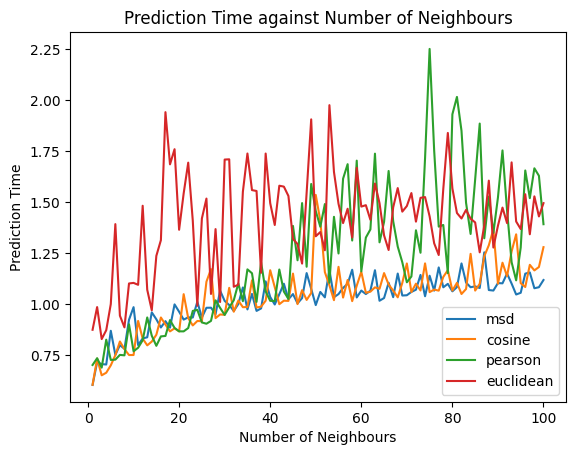

In [36]:
# Plot the RMSE, fit time and prediction time against the number of neighours on the same graph for the four similarity metrics
plt.plot(msd_df.loc['rmse'], label='msd')
plt.plot(cosine_df.loc['rmse'], label='cosine')
plt.plot(pearson_df.loc['rmse'], label='pearson')
plt.plot(euclidean_df.loc['rmse'], label='euclidean')
plt.xlabel('Number of Neighbours')
plt.ylabel('RMSE')
plt.title('RMSE against Number of Neighbours')
plt.legend()
plt.show()

plt.plot(msd_df.loc['fit_time'], label='msd')
plt.plot(cosine_df.loc['fit_time'], label='cosine')
plt.plot(pearson_df.loc['fit_time'], label='pearson')
plt.plot(euclidean_df.loc['fit_time'], label='euclidean')
plt.xlabel('Number of Neighbours')
plt.ylabel('Fit Time')
plt.title('Fit Time against Number of Neighbours')
plt.legend()
plt.show()

plt.plot(msd_df.loc['prediction_time'], label='msd')
plt.plot(cosine_df.loc['prediction_time'], label='cosine')
plt.plot(pearson_df.loc['prediction_time'], label='pearson')
plt.plot(euclidean_df.loc['prediction_time'], label='euclidean')
plt.xlabel('Number of Neighbours')
plt.ylabel('Prediction Time')
plt.title('Prediction Time against Number of Neighbours')
plt.legend()
plt.show()



We will be using the default parameters set in the KNNBasic for our comparison between the different algorithms.

In [12]:
import time
KNN = KNNBasic(sim_options=sim_options)
begin_fit = time.time()
KNN.fit(train)
end_fit = time.time()
begin_predict = time.time()
end_predict = time.time()
KNN.test(test)
result = rmse(KNN.test(test))
row = {"Algorithm":"KNN","Fit Time":end_fit-begin_fit,"Prediction Time":end_predict-begin_predict}
print(row)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9961
{'Algorithm': 'KNN', 'Fit Time': 0.2552497386932373, 'Prediction Time': 0.0}


In [13]:
testdf = pd.DataFrame(test)
testdf = testdf.rename(columns={
    0: "UserId",
    1: "MovieId",
    2: "Actual Rating"
})
testdf["Predicted Rating"] = -1
testdf["Error"] = -1
for index, row in testdf.iterrows():
  testdf.loc[index, 'Predicted Rating'] = KNN.predict(row["UserId"], row["MovieId"], row["Actual Rating"]).est
for index, row in testdf.iterrows():
  testdf.loc[index, 'Error'] = '{:.2f}'.format(abs(row["Predicted Rating"] - row["Actual Rating"]))

testdf


,UserId,MovieId,Actual Rating,Predicted Rating,Error
0,387,3801,4.0,3.250298,0.75
1,534,507,4.0,3.399971,0.60
2,480,8874,5.0,3.790214,1.21
3,575,3469,4.0,4.612325,0.61
4,214,1219,4.0,4.312257,0.31
...,...,...,...,...,...
24996,367,2858,3.5,4.401462,0.90
24997,654,33794,4.5,4.026311,0.47
24998,30,903,4.0,4.189811,0.19
24999,537,1188,5.0,3.335051,1.66


In [14]:
worst_predictions = testdf.sort_values(by='Error',ascending=False)[:50]
best_predictions = testdf.sort_values(by='Error',ascending=False)[-50:]

best_predictions

,UserId,MovieId,Actual Rating,Predicted Rating,Error
12859,509,1500,4.0,3.999958,0.00
12835,564,2044,2.0,2.000000,0.00
12810,580,444,3.5,3.502974,0.00
12803,558,846,4.0,4.000000,0.00
7273,270,68659,3.5,3.495136,0.00
12755,48,62250,3.0,3.000000,0.00
1822,30,3507,4.0,4.000174,0.00
3306,130,2993,3.5,3.495634,0.00
12735,587,50658,4.5,4.495047,0.00
12692,407,5417,3.0,2.997608,0.00


In [15]:
worst_predictions

,UserId,MovieId,Actual Rating,Predicted Rating,Error
6612,119,3490,1.0,5.000000,4.00
7548,564,2419,5.0,1.000000,4.00
4687,547,67788,0.5,4.500000,4.00
4214,168,255,1.0,5.000000,4.00
20485,57,1326,1.0,5.000000,4.00
1963,605,255,1.0,5.000000,4.00
4383,176,1232,0.5,4.494495,3.99
17405,174,1252,0.5,4.487349,3.99
7045,262,65188,0.5,4.347388,3.85
8555,660,593,0.5,4.349949,3.85
